In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import emoji
from emosent import get_emoji_sentiment_rank

In [2]:
train_dataset_path = "datasets/train_task_a_full.txt"
test_dataset_path = "datasets/test_task_a_full.txt"

In [3]:
train_df = pd.read_csv(train_dataset_path, sep="\t")
train_df.rename(columns={"Tweet index": "index", "Label": "label", "Tweet text": "text"},
                inplace=True)

test_df = pd.read_csv(test_dataset_path, sep="\t")
test_df.rename(columns={"Tweet index": "index", "Label": "label", "Tweet text": "text"},
               inplace=True)
train_df.head()

,index,label,text
0,1,1,Sweet United Nations video. Just in time for C...
1,2,1,@mrdahl87 We are rumored to have talked to Erv...
2,3,1,Hey there! Nice to see you Minnesota/ND Winter...
3,4,0,3 episodes left I'm dying over here
4,5,1,I can't breathe! was chosen as the most notabl...


C:\Users\andri\Projects\FER-TAR\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='label'>

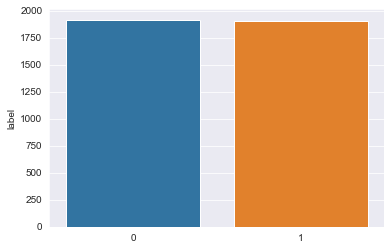

In [4]:
value_counts = train_df["label"].value_counts()
sns.barplot(value_counts.index, value_counts)

In [5]:
train_df["word_count"] = train_df["text"].apply(lambda x: len(x.split()))
print("mean word count in non ironic tweets:",
      train_df[train_df["label"] == 0]["word_count"].mean())
print("mean word count in ironic tweets:",
      train_df[train_df["label"] == 1]["word_count"].mean())

mean word count in non ironic tweets: 13.916492693110648
mean word count in ironic tweets: 13.677538137822198


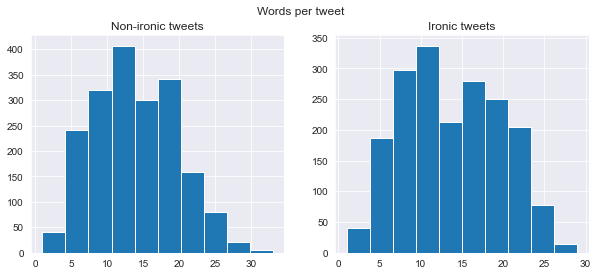

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle("Words per tweet")

train_words = train_df[train_df["label"] == 0]
train_words = train_words[train_words["word_count"] < 50]["word_count"]
ax1.hist(train_words, bins=10)
ax1.set_title("Non-ironic tweets")

train_words = train_df[train_df["label"] == 1]
train_words = train_words[train_words["word_count"] < 50]["word_count"]
ax2.hist(train_words, bins=10)
ax2.set_title("Ironic tweets")

plt.show()

In [7]:
def extract_emojis(text):
    return "".join(c for c in text if c in emoji.UNICODE_EMOJI['en'])


def has_emojis(text):
    return len(extract_emojis(text)) == 0


def get_emoji_sentiment_score(emoji):
    try:
        return get_emoji_sentiment_rank(emoji)["sentiment_score"]
    except KeyError:
        return None


def get_mean_emoji_sentiment_score(emojis):
    if len(emojis) == 0:
        return np.nan

    scores = [get_emoji_sentiment_score(e) for e in emojis]
    scores = [s for s in scores if s is not None]
    return np.mean(scores)

In [8]:
train_df["emojis"] = train_df["text"].apply(extract_emojis)
train_df["emoji_count"] = train_df["emojis"].apply(lambda x: len(x))
train_df["emoji_sentiment_scores"] = train_df["emojis"].apply(get_mean_emoji_sentiment_score)

test_df["emojis"] = test_df["text"].apply(extract_emojis)
test_df["emoji_count"] = test_df["emojis"].apply(lambda x: len(x))
test_df["emoji_sentiment_scores"] = test_df["emojis"].apply(get_mean_emoji_sentiment_score)

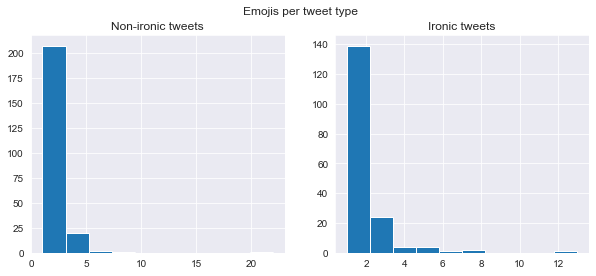

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle("Emojis per tweet type")

nonironic_emoji_count = train_df[train_df["label"] == 0]["emoji_count"]
ax1.hist(nonironic_emoji_count[nonironic_emoji_count > 0])
ax1.set_title("Non-ironic tweets")

ironic_emoji_count = train_df[train_df["label"] == 1]["emoji_count"]
ax2.hist(ironic_emoji_count[ironic_emoji_count > 0])
ax2.set_title("Ironic tweets")

plt.show()

In [10]:
print("mean emoji count in non ironic tweets:",
      nonironic_emoji_count.mean())
print("mean emoji count in ironic tweets:",
      ironic_emoji_count.mean())

mean emoji count in non ironic tweets: 0.23799582463465555
mean emoji count in ironic tweets: 0.1704366123093109


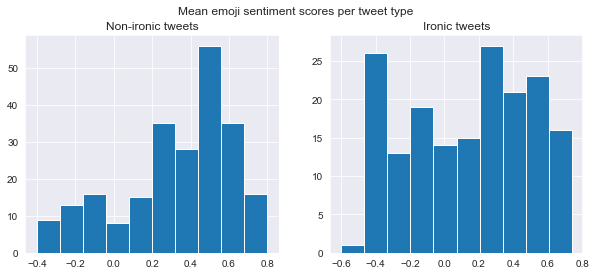

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle("Mean emoji sentiment scores per tweet type")

nonironic_emoji_sentiment_scores = train_df[train_df["label"] == 0]["emoji_sentiment_scores"]
ax1.hist(nonironic_emoji_sentiment_scores[nonironic_emoji_sentiment_scores.notnull()], bins=10)
ax1.set_title("Non-ironic tweets")

ironic_emoji_sentiment_scores = train_df[train_df["label"] == 1]["emoji_sentiment_scores"]
ax2.hist(ironic_emoji_sentiment_scores[ironic_emoji_sentiment_scores.notnull()], bins=10)
ax2.set_title("Ironic tweets")

plt.show()

In [13]:
print("mean emoji sentiment score in non ironic tweets:",
     nonironic_emoji_sentiment_scores[nonironic_emoji_sentiment_scores.notnull()].mean())
print("mean emoji sentiment score in ironic tweets:",
      ironic_emoji_sentiment_scores[ironic_emoji_sentiment_scores.notnull()].mean())

mean emoji sentiment score in non ironic tweets: 0.32410815295815293
mean emoji sentiment score in ironic tweets: 0.13938866928309787


In [14]:
def remove_emojis(text):
    return "".join(c for c in text if c not in emoji.UNICODE_EMOJI['en'])

In [83]:
train_df_with_emojis_only = train_df[train_df["emoji_count"] > 0]
test_df_with_emojis_only = test_df[test_df["emoji_count"] > 0]

In [84]:
train_df_with_emojis_only_removed = train_df_with_emojis_only[["index", "label", "text"]].copy()
train_df_with_emojis_only_removed["text"] = train_df_with_emojis_only_removed["text"].apply(remove_emojis)

test_df_with_emojis_only_removed = test_df_with_emojis_only[["index", "label", "text"]].copy()
test_df_with_emojis_only_removed["text"] = test_df_with_emojis_only_removed["text"].apply(remove_emojis)

In [85]:
train_df.to_csv("datasets/train_task_a_full_analyzed.txt", sep="\t", index=False)
test_df.to_csv("datasets/test_task_a_full_analyzed.txt", sep="\t", index=False)

train_df_with_emojis_only.to_csv("datasets/train_task_a_only_with_emojis_analyzed.txt", sep="\t", index=False)
test_df_with_emojis_only.to_csv("datasets/test_task_a_only_with_emojis_analyzed.txt", sep="\t", index=False)

train_df_with_emojis_only_removed.to_csv("datasets/train_task_a_only_with_emojis_removed.txt", sep="\t", index=False)
test_df_with_emojis_only_removed.to_csv("datasets/test_task_a_only_with_emojis_removed.txt", sep="\t", index=False)